In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("cardata1.csv")

In [3]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Label Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoders
le_car_name = LabelEncoder()
le_fuel_type = LabelEncoder()
le_selling_type = LabelEncoder()
le_transmission = LabelEncoder()

# Fit the encoders on the original categorical data
le_car_name.fit(dataset['Car_Name'])
le_fuel_type.fit(dataset['Fuel_Type'])
le_selling_type.fit(dataset['Selling_type'])
le_transmission.fit(dataset['Transmission'])

# Transform the categorical columns
dataset['Car_Name'] = le_car_name.transform(dataset['Car_Name'])
dataset['Fuel_Type'] = le_fuel_type.transform(dataset['Fuel_Type'])
dataset['Selling_type'] = le_selling_type.transform(dataset['Selling_type'])
dataset['Transmission'] = le_transmission.transform(dataset['Transmission'])

In [7]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


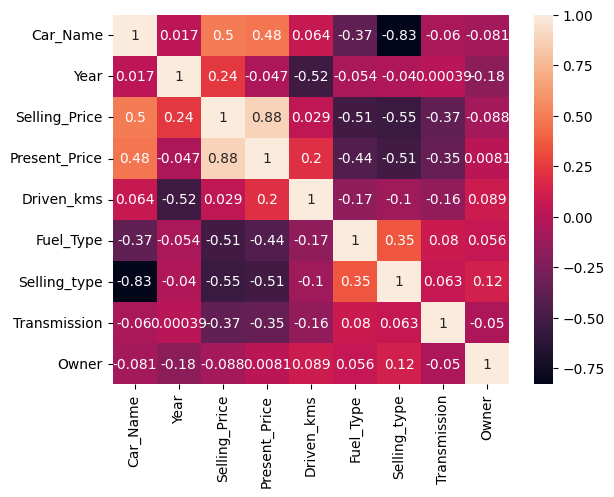

In [4]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Input data & Output Data

In [5]:
output_data = dataset["Selling_Price"]
input_data = dataset.drop("Selling_Price", axis=1)

# Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [11]:
# ss=StandardScaler()
# input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [9]:
input_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [10]:
output_data

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# splitting of data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

# Model Training

In [7]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_train,y_train)*100,lr.score(X_test,y_test)*100

(88.37319983657575, 84.64540623822295)

In [17]:
lr1=Lasso(alpha=0.5)
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train),lr.score(X_test,y_test)

(0.8586512914625438, 0.8464540623822294)

In [14]:
lr2=Ridge(alpha=0.5)
lr2.fit(X_train,y_train)
lr2.score(X_train,y_train),lr2.score(X_test,y_test)

(0.8837189838780872, 0.8468569653785681)

In [15]:
lr3=ElasticNet(alpha=0.5)
lr3.fit(X_train,y_train)
lr3.score(X_train,y_train),lr3.score(X_test,y_test)


(0.8594919032059941, 0.82405796886535)

## Decision Tree

In [17]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,dt.predict(X_test))
r2 = r2_score(y_test, dt.predict(X_test))
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.04732131147541
R-squared Score: 0.9545346326874012


In [13]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestRegressor()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,rf.predict(X_test))
r2 = r2_score(y_test, rf.predict(X_test))
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.8292877367213115
R-squared Score: 0.9639997094065116


# Prediction

In [26]:
rf.predict([[1.074323	,0.128897,	-0.236256	,-0.256224,	0.50018,	-0.737285,	0.39148	,-0.174501]])

C:\Users\rabin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.4826])

In [27]:
print(dataset.head(1))

   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   

   Selling_type  Transmission  Owner  
0             0             1      0  


In [28]:
new_data=pd.DataFrame([["ritz",	2014,		5.59,	27000	,"Petrol",	"Dealer",	"Manual",	0]],columns=X_train.columns)

In [29]:
new_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [30]:
new_data['Car_Name']= le_car_name.transform(new_data['Car_Name'])

In [31]:
new_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,Petrol,Dealer,Manual,0


In [32]:
new_data['Fuel_Type']= le_fuel_type.transform(new_data['Fuel_Type'])

In [33]:
new_data['Selling_type']= le_selling_type.transform(new_data['Selling_type'])

In [34]:
new_data['Transmission']= le_transmission.transform(new_data['Transmission'])

In [1]:
# ss.transform(new_data)

In [ ]:
# new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [36]:
rf.predict(new_data)

array([3.7735])

# pickle file

In [37]:

import pickle
with open('Fmodel.pkl', 'wb') as f:
    pickle.dump(rf, f)